# Quiz 4 Review
---



# Decision Trees

- Decision Trees are **non-parametric** models which means they only consider 1 feature at a time. They do not consider how multiple features interact simultaneously.

### Understand the core concepts behind decision tree classifiers
- By continuing to make splits we can isolate similar classes.
- Decision Trees are a "greedy" model and thus they consider the optimal option at each split. They don't optimize the whole tree.   
- Don't need to scale features because each feature is considered individually.
- Does not care about distribution of features.
- Interpretable.

### For classification problems:
- Gini is the most common calculation when deciding how to make a split.  We want to make splits that result in isolating the largest chunks of similar observations/classes.


**Decision Tree Regressor**
- Works similar to a classifier but makes splits to optimize (minimize) a loss metric such as MSE.
- Before it makes a split, it looks at the current MSE and tries to identify the split that minimizes MSE.
---

In [1]:
# Load Data
import seaborn as sns
iris = sns.load_dataset('iris') 
### iris's species column is an object column and not a integer
### As in, species names are list in text and the values are not converted to 0s,1s or 2s
# Instantiate Classifier

In [2]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 3,min_samples_split=5)

In [2]:
# Make X and y
X = iris.drop('species', axis = 1)
y = iris['species']

# fit model
dtc.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
from sklearn.tree import plot_tree

[Text(125.55000000000001, 190.26, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(41.85, 27.180000000000007, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(209.25, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

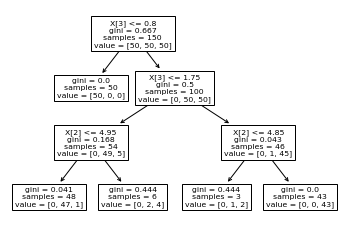

In [7]:
plot_tree(dtc)

# Bagging, Boosting & Other Ensemble Methods.

### Bootstrapping

Random sample with replacement.

In [10]:
X.sample(5, replace=True, random_state=42)

,sepal_length,sepal_width,petal_length,petal_width
102,7.1,3.0,5.9,2.1
92,5.8,2.6,4.0,1.2
14,5.8,4.0,1.2,0.2
106,4.9,2.5,4.5,1.7
71,6.1,2.8,4.0,1.3


### Tree-based ensembles

There are variations for classification and regression. 

**Bagged Models**  
- Bagging = Bootstrap AGGregatING.  
- Build several models on random bootstrapped samples, then averaging the predictions of each model.
- Parallelizable.


**Random Forests**
- Random because they use random subsets of the feature columns to build each tree.
- The goal is to create trees that don't rely on "overly important features" and thus need to be able to generalize the data from other, maybe less important columns.
- Start with a random subset of features for each tree.
- Each split _can_ only consider an additional random subset of features.  (By default in sklearn the number of features considered at each split point is the square root of the total number of features).
- Random forests are very powerful and tend to do well at reducing variance.  

**ExtraTrees : _Extremely Random Trees_**
- Extra Trees work similarly to Random forests, except they add an additional layer of randomness.
- For each decision node, the ExtraTrees model only considers one possible split per feature/column.
- Typically ExtraTree models are grown wider and deeper to account for the randomness.

### Understand the differences between bagging and boosting.
**Bagging**
- Aggregates the results of all models simultaneously. Takes the mean of the trees for a regression problem and takes the majority vote of the trees in classification problem.
- Bootstrap sampling makes each model unique in that it is (hopefully) exposed to data that is slightly different.
- Model building can be parallelized.

**Boosting**
- Sequential model building
- One model is built after learning from the previous.
- Models learn from the mistakes of the models that they are built on.



### Learn the pros and cons to using boosting models.
- Boosting uses trees that are not deep. These are known as _weak learners_, 

**Pros**
- Generally achieve higher performance than bagging when the hyperparameters are well tuned.

**Cons**
- Time consuming to properly tune hyperparameters.
- Cannot be parallelized like bagging (bad scalability when there are huge amounts of data).
- Higher risk of overfitting compared to bagging (so have to tune well) 😀.


### AdaBoost
- Adaboost stands for Adaptive Boosting

Core principal: overweight difficult data points so that they are more likely to appear in subsequent data ponts.

_Difficult data points_ refers to the data points that the model classified incorrectly (for a classification problem).

- Each tree in the ensemble takes a dataset (reweighted if following a previous model) and makes a split.  Incorrect classifications are overweighted, and the process happens again.  

- Predictions are aggregated in the end with more accurate trees getting higher weights and less accurate trees get less of a weight.
    
### Gradient Boosting

- Gradient Boosting's core principal is predicting the residuals/errors of the previous model.
- For a regression problem, think:
    - build a linear regression model
    - calculate the residuals
    - build another linear regression model to predict the residuals
    - combine the prediction of the first model with the residuals of the second model to incorporate the predicted error with the prediction to come to (hopefully) a better result.
    - repeat

# Quick Recap of Trees and Ensembles

### Decision Tree 
Algorithm that takes best split in a feature (maximize purity for classification or minimize RMSE for regression problem). Like asking questions.

### Bagging
Bootstrap aggregating. Bootstrap = randomized sample with replacement. Multiple trees averaged.

## Ensemble Methods

### Random Forest
Bootstrap multiple trees, but only use a subset of features with each tree.

### Extra Trees - (Extremely Randomized Trees) 

Like random forests, but uses bagging instead of bootstrapped sampling and make random splits instead of best splits. 

### Boosting

#### Gradient Boosting

Learn from previous trees by creating new trees that predict the errors from the previous trees. Sequential. Lots of weak learner trees (not deep). 

#### Ada Boost

Increased probability for each sample that gets misclassified of appearing in the tree built. Sequential. Bootstrapped, so sample may appear many times. 



### Voting Classifier 

Make your own ensemble!

(Also VotingRegressor).

```` 

vote = VotingClassifier([
    ('ada', AdaBoostClassifier()),
    ('gb', GradientBoostingClassifier())
])
````

---
# Support Vector Machines (SVMs)

### Describe linear separability.
- Can be separated by a line.

### Differentiate between maximal margin classifiers, support vector classifiers, and support vector machines.

**Maximal Margin SVM Classifiers**
- Finds the best line to separate classes that maximizes the margin between the classes.
- It wants to draw the boundary line that creates the largest "No Man's Land/Demilitarized Zone" that is equal on both sides. 
- If data is noisy, might not work.
- Only exists when we can _perfectly_ separates our groups.

**Soft-margin SVM Classifiers**
- Like maximal margin SVM classifiers, but allows leniency of observations to cross the margins. Necessary because perfectly separable classes are often not possible.

**Kernel SVMs**
- Unlikely that we can find linear separability in our data, so we should consider non-linear separability. 
- With RBF kernel trick we transform our features into more dimensions where we can use a hyperplane to separate the data.

### Implement SVMs in scikit-learn


### Describe the effects of C and kernels on SVMs.
- _C_ is a regularization parameter. Like with LogisticRegression, more C = less regularization.

- C is the leniency in regards to mow many missclassifications are OK when drawing our line of separation.
- If C is small: We get a less flexible boundary between our classes, leading to a less perfect classification of our training data.
- If C is large: We get a more flexible boundary between our classes, leading to a more perfect classification of our training data.

#### Kernels
_Kernel Trick_ - take our data and force it into higher dimensions to find the best linear boundary between classes. 

The parameter `kernel` allows us to control how we force our data into higher dimensions.

- **`rbf` (default): Radial basis kernel**. Radial, like radius, works particularly well with circular/spherical data. You need to specify hyperparameter gamma as well, where gamma > 0.
- **`linear`: Linear kernel**. This gives us the support vector classifier. This works best with linearly separable data.
- **`polynomial`: Polynomial kernel**. This can well with non-linear and non-spherical data. - Can be good for NLP.
- **`sigmoid`: Sigmoid kernel**. This can well with non-linear and non-spherical data.


# Generalized Linear Models 

Describe generalized linear models.

All GLMs will have three components:

- **Linear**

    - The linear component will always be the linear formula $\beta_0 + \beta_1X_1 + \cdots + \beta_pX_p$.
    
- **Link**

    - The link function will transform the linear component into the range of interest.

- **Random**
    - The random component connects our predictions $\hat{Y}_i$ to our observed values $Y_i$ by using a statistical distribution to model our errors.

### Linear Regression
When do we use it? 
    - When we want to model something on the $(-\infty,\infty)$ range

### Logistic Regression
When do we use it? 
    - For predicting values between 0 and 1. 

### Poisson Regression 
When do we use it? 
    - When we want to model something on the $\{0,1,2,\ldots\}$ range... like number of cars on through a toll road, number of objects sold or number of awards earned!

### Gamma Regression 
When do we use it? 
    - When we want to model something on the $[0,\infty)$ range... like time until some event occurs!

#### Not necessary to memorize, but feel free to go back and review:

- What's the link function for each of the above?
- What's the distribution?

# Gradient Descent




1. **Understand** the intuition behind gradient descent.

Gradient Descent is how many machine learning algorithms fit models. They try to **Iteratively** solve for the absolute best parameters given certain features (our X), associated targets (our y), and a cost function (such as MSE).

They try to find the minimum result of the cost function. 

They take steps down the curve by using the derivative to decide which way to go. 

Requires a learning rate (alpha). The learning rate tells you how far to move to the side. (Along the X axis if there is only one feature).

For instance we use gradient descent to solve for the best coefficients when we fit a lasso regression. 

2. **Implement** gradient descent.

- Start with a random value for beta(s), a learning rate, and a loss function.

- Find the derivative using the loss function and your values for x . 

    - If negative, move right, if positive, move left. 

- How far you move to the right or left is based on the learning rate (alpha).
    
- Update the beta weight coefficients based on the learning rate . 

- Repeat the loop until stopping rate is met (not much improvement or run out iterations)!  
    - find derivative
    - move along the x axis in the indicated direction, as far as the learning rate tells you
    - update beta weight coefficients

3. **Understand** common pitfalls associated with gradient descent.

<img src="./assets/gdpitfal.png" height="400" width="600">

![](./assets/gdpitfal.png)

---
<img src="./assets/gdpitfall2.png" height="400" width="600">

- If step size is too big, convergence may not happen. You might bounce back and forth above the minimum.
- If too small, it may take too long to converge (run out of iterations).
- Potential to get stuck in a local minimum, if one exists.

4. **Identify** solutions for common pitfalls.


#### Solution 1

Change the learning rate over time. 
    - One common method is to start large and then make it smaller. 
    - You can also draw the learning rate at each iteration from a distribution.


#### Solution 2

Try several complete runs and change the starting point of the algorithm each time. 

If we get nearly identical results a few times, we can be more confident that we've arrived at the global minimum. 

### Understand convex vs. nonconvex loss functions 

#### A convex loss function has one minimum.

There is not a local minimum that is different from the global minimum. 

Here's an example of a convex loss function.

![](https://i.stack.imgur.com/w2KpJ.gif)


Source: Avik Mohan  https://stats.stackexchange.com/a/324570/198892

#### A non-convex loss function has a local minimum that is not the global minimum.

Here's a non-convex loss function:

![](https://i.stack.imgur.com/XrUE6.gif)

It's got a hump.

Source: Avik Mohan  https://stats.stackexchange.com/a/324570/198892


### Understand the difference between local minimum and global minimum.

In the image above, the valley to the left is a local minimum. It's a valley. It's not the lowest valley.

The valley on the right is the lowest valley. It is the global maximum.